In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [22]:
twitter_data = pd.read_csv("after.csv")

In [23]:
twitter_data.head()

,Username,Userid,Profile_Description,Verified?,Count_of_Followers,Count_of_Friends,Total_list_count,Location,Party,Tweet,is_election,is_favour,Tweet_Datatime,Tweet_Id,Tweet_URL,Tweet_ReplyCount,Tweet_retweetCount,Tweet_LikeCount,Tweet_quoteCount
0,myogiadityanath,3437532637,"मुख्यमंत्री (उत्तर प्रदेश); गोरक्षपीठाधीश्वर, ...",True,18827337,50,3127,"गोरखपुर, उत्तर प्रदेश",bjp,आदरणीय प्रधानमंत्री श्री @narendramodi जी के न...,NaN,NaN,2022-04-05 22:24:00+00:00,1511469731034796032,https://twitter.com/myogiadityanath/status/151...,484,1669,11582,30
1,myogiadityanath,3437532637,"मुख्यमंत्री (उत्तर प्रदेश); गोरक्षपीठाधीश्वर, ...",True,18827337,50,3127,"गोरखपुर, उत्तर प्रदेश",bjp,अंत्योदय से राष्ट्रोदय' के सुपथ पर गतिशील भारत...,NaN,NaN,2022-04-05 22:20:00+00:00,1511468724166955008,https://twitter.com/myogiadityanath/status/151...,211,1105,6302,8
2,myogiadityanath,3437532637,"मुख्यमंत्री (उत्तर प्रदेश); गोरक्षपीठाधीश्वर, ...",True,18827337,50,3127,"गोरखपुर, उत्तर प्रदेश",bjp,उदात्त लोकतांत्रिक व राष्ट्रीय मूल्यों के प्रत...,NaN,NaN,2022-04-05 22:16:00+00:00,1511467717760471042,https://twitter.com/myogiadityanath/status/151...,589,2204,15186,36
3,myogiadityanath,3437532637,"मुख्यमंत्री (उत्तर प्रदेश); गोरक्षपीठाधीश्वर, ...",True,18827337,50,3127,"गोरखपुर, उत्तर प्रदेश",bjp,आदरणीय प्रधानमंत्री जी द्वारा विभिन्न प्रकार क...,NaN,NaN,2022-04-05 05:59:20+00:00,1511221932997615617,https://twitter.com/myogiadityanath/status/151...,494,1428,6565,26
4,myogiadityanath,3437532637,"मुख्यमंत्री (उत्तर प्रदेश); गोरक्षपीठाधीश्वर, ...",True,18827337,50,3127,"गोरखपुर, उत्तर प्रदेश",bjp,"प्रखर स्वतंत्रता संग्राम सेनानी, कर्मठ, जुझारू...",NaN,NaN,2022-04-05 01:32:36+00:00,1511154808073625600,https://twitter.com/myogiadityanath/status/151...,687,2613,20827,43


## Preprocessing data

In [24]:
# dropping duplicates

twitter_data = twitter_data.drop_duplicates()

In [25]:
def fun1(x):
    if(x == '0\t-1'):
        return '0'
    else:
        return x

def fun2(x):
    if(x == '-'):
        return '0'
    elif (x == '--1'):
        return '-1'
    elif (x == '1-1'):
        return '1'
    else:
        return x

In [26]:
twitter_data['is_election'] = twitter_data['is_election'].fillna(0)
twitter_data['is_election'] = twitter_data['is_election'].map(fun1)
twitter_data['is_election'] = twitter_data['is_election'].astype('int64')


twitter_data['is_favour'] = twitter_data['is_favour'].fillna(0)
twitter_data['is_favour'] = twitter_data['is_favour'].map(fun2)
twitter_data['is_favour'] = twitter_data['is_favour'].astype('int64')

## Analysis

In [27]:
def get_politicians(party):
    politicians = twitter_data[twitter_data['Party'] == party]['Username']
    return list(set(politicians))

In [28]:
def count_of_followers(politicians_list):
    count_of_followers_dict = {}
    for politician in politicians_list:
        count_of_followers_dict[politician] = \
        twitter_data[twitter_data['Username'] == politician]['Count_of_Followers'].iloc[0]
    return count_of_followers_dict

In [29]:

def ReplyCount(politicians_list):
    Tweet_ReplyCount = {}
    for politician in politicians_list:
        Tweet_ReplyCount[politician] = twitter_data[twitter_data['Username'] == politician]['Tweet_ReplyCount'].iloc[0]
    return Tweet_ReplyCount

def QuoteCount(politicians_list):
    Tweet_QuoteCount = {}
    for politician in politicians_list:
        Tweet_QuoteCount[politician] = twitter_data[twitter_data['Username'] == politician]['Tweet_quoteCount'].iloc[0]
    return Tweet_QuoteCount


In [30]:
def total_tweets(politicians_list):
    
    total_tweets_dict = {}
    for politician in politicians_list:
        total_tweets_dict[politician] = \
        twitter_data[twitter_data['Username'] == politician].describe()['Tweet_Id']['count']
    return total_tweets_dict

In [31]:
def total_likes(politicians_list,is_election,is_favour):
    
    likes_dict= {}
    
    for politician in politicians_list:
        ptn = twitter_data[twitter_data['Username'] == politician]
        likes = ptn[ptn['is_election'] == is_election][ptn['is_favour'] == is_favour]['Tweet_LikeCount']
        likes_dict[politician] = likes.describe()['75%']
    return likes_dict

In [32]:
def total_retweets(politicians_list,is_election,is_favour):
    
    retweets_dict= {}
    
    for politician in politicians_list:
        ptn = twitter_data[twitter_data['Username'] == politician]
        retweets = ptn[ptn['is_election'] == is_election][ptn['is_favour'] == is_favour]['Tweet_retweetCount']
        retweets_dict[politician] = retweets.describe()['75%']
    return retweets_dict

In [33]:
def count_of_tweets(politicians_list,is_election,is_favour):
    
    count_of_tweets_p= {}
    
    for politician in politicians_list:
        ptn = twitter_data[twitter_data['Username'] == politician]
        tweets = ptn[ptn['is_election'] == is_election][ptn['is_favour'] == is_favour]
        count_of_tweets_p[politician] = tweets.describe()['is_election']['count']
    return count_of_tweets_p

In [34]:
politicians_bjp = get_politicians('bjp')
count_of_followers_bjp = count_of_followers(politicians_bjp)
mean_likes_bjp = total_likes(politicians_bjp,1,1)
count_of_tweets_1_1 = count_of_tweets(politicians_bjp,1,1)
mean_retweets_bjp = total_likes(politicians_bjp,1,1)


politicians=['myogiadityanath','yadavakhilesh','priyankagandhi']
quotes_of_politicians=QuoteCount(politicians)
count_of_reply=ReplyCount(politicians)

print(quotes_of_politicians)
print(count_of_reply)


/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be re

{'myogiadityanath': 30, 'yadavakhilesh': 128, 'priyankagandhi': 81}
{'myogiadityanath': 484, 'yadavakhilesh': 913, 'priyankagandhi': 529}


/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [35]:
total_likes(politicians_bjp,1,1)

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8448/1285546056.py:7: UserWarning:

Boolean Series key will be re

{'BJPVinodSonkar': 55.25,
 'smritiirani': nan,
 'kpmaurya1': 1803.0,
 'myogiadityanath': nan,
 'babyranimaurya': nan,
 'asim_arun': 2262.25,
 'AditiSinghRBL': 2025.5,
 'brajeshpathakup': nan,
 'shaziailmi': nan,
 'AnilRajbharbjp': 617.0,
 'ptshrikant': nan}

In [36]:
x = [330,1451,1988,1808]
y = [91,428,1437,954]
z = [1849,48.25,6168,1026.75]

In [37]:
# x - followers y - mean_likes z - 1_1 count
fig = px.scatter(['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'], x=x, y=y,size=z,  
                 color=['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'],
                 hover_name=['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'],log_x=True, size_max=60)
fig.show()

In [38]:
# x - followers y - mean_retweets z - 1_1 count
fig = px.scatter(x=x, y=y,size=z,  
                 color=['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'],
                 hover_name=['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'],log_x=True, size_max=60)
fig.show()

In [39]:
# x - no of tweets y - 1_1 count z - likes for 1_1
fig = px.scatter(x=x, y=y,size=z,  
                 color=['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'],
                 hover_name=['smritiirani','BJPVinodSonkar','myogiadityanath','kpmaurya1'],log_x=True, size_max=60)
fig.show()

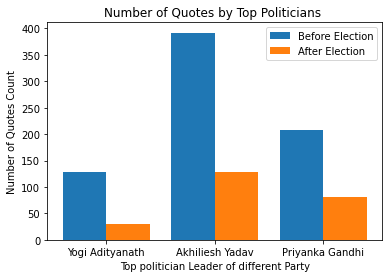

In [43]:
#quotes of politicians
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Yogi Adityanath','Akhiliesh Yadav','Priyanka Gandhi']
Ygirls = [128,392,208]
Zboys = [30,128,81]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Before Election')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'After Election')
  
plt.xticks(X_axis, X)
plt.xlabel("Top politician Leader of different Party")
plt.ylabel("Number of Quotes Count")
plt.title("Number of Quotes by Top Politicians ")
plt.legend()
plt.show()

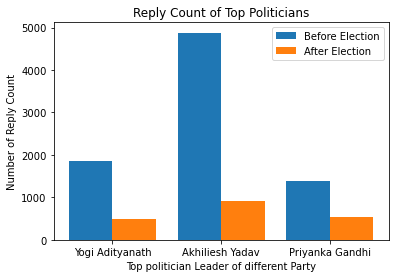

In [44]:
#reply count
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Yogi Adityanath','Akhiliesh Yadav','Priyanka Gandhi']
Ygirls = [1850,4879,1380]
Zboys = [484,913,529]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Before Election')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'After Election')
  
plt.xticks(X_axis, X)
plt.xlabel("Top politician Leader of different Party")
plt.ylabel("Number of Reply Count")
plt.title("Reply Count of Top Politicians")
plt.legend()
plt.show()

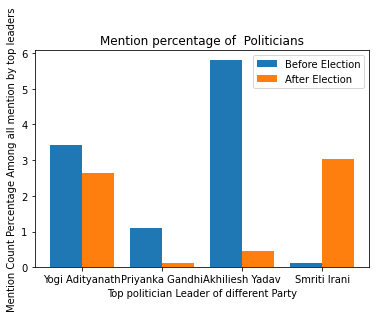

In [49]:
#mentione percentage
import numpy as np 
import matplotlib.pyplot as plt 
  
mention1=65.20
mention2=27.92

X = ['Yogi Adityanath','Priyanka Gandhi','Akhiliesh Yadav',"Smriti Irani"]
Ygirls = [223,72,378,8]        #before  
Zboys = [74,3,13,85]          #after

for i in range(len(Ygirls)):
    Ygirls[i]/=mention1
    Zboys[i]/=mention2


X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Before Election')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'After Election')
  
plt.xticks(X_axis, X)
plt.xlabel("Top politician Leader of different Party")
plt.ylabel("Mention Count Percentage Among all mention by top leaders")
plt.title("Mention percentage of  Politicians")
plt.legend()
plt.show()

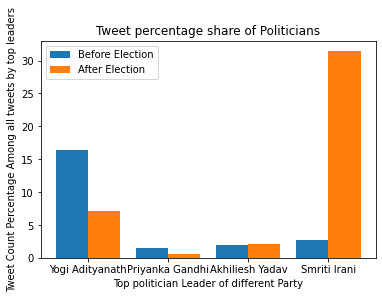

In [51]:
#tweet percentage
import numpy as np 
import matplotlib.pyplot as plt 
  
tweetCount1=121.30
tweetCount2=30.33
  
X = ['Yogi Adityanath','Priyanka Gandhi','Akhiliesh Yadav',"Smriti Irani"]
Ygirls = [1988,191,231,330]
Zboys = [218,20,63,954]


for i in range(len(Ygirls)):
    Ygirls[i]/=tweetCount1
    Zboys[i]/=tweetCount2

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Before Election')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'After Election')
  
plt.xticks(X_axis, X)
plt.xlabel("Top politician Leader of different Party")
plt.ylabel("Tweet Count Percentage Among all tweets by top leaders")
plt.title("Tweet percentage share of Politicians")
plt.legend()
plt.show()